# EDA：視覺化更多圖表的技巧（作業說明欄請勿調成編輯模式，以防下方示意圖片無法使用）

## 作業程式碼
本作業將請學員完成以下要求：
1. 請至 Kaggle 平台找尋欲探索的資料集，進行本次作業。
2. 請參考圖一的 2 x 3 子圖配置，分別使用 plt.subplot、plt.subplots() 與 plt.add_subplot() 完成視覺化
3. 請參考圖二的不規則子圖配置以及相對應的圖表種類，利用 plt.GridSpec() 完成視覺化。

<center>

![](%E5%9C%96%E7%89%871.png) 

圖一   
![](%E5%9C%96%E7%89%872.png) 

圖二
</center>

## 匯入套件

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## 匯入資料與簡單的資料探索

In [17]:
# ⭐ 解決中文字亂碼 ⭐
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei']
plt.rcParams['axes.unicode_minus'] = False

In [18]:
# 輸入資料
file_path = r"D:\Github\ML100Days\Medicalpremium.csv"

df = pd.read_csv(file_path)
df.head()

# 探索每個資料欄位與遺失值概況
#df.isnull().sum()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
0,45,0,0,0,0,155,57,0,0,0,25000
1,60,1,0,0,0,180,73,0,0,0,29000
2,36,1,1,0,0,158,59,0,0,1,23000
3,52,1,1,0,1,183,93,0,0,2,28000
4,38,0,0,0,1,166,88,0,0,1,23000


In [7]:
# 為求學習方便，在此先將有遺失值的資料剔除掉
df = df.dropna()
df.isnull().sum()

Age                        0
Diabetes                   0
BloodPressureProblems      0
AnyTransplants             0
AnyChronicDiseases         0
Height                     0
Weight                     0
KnownAllergies             0
HistoryOfCancerInFamily    0
NumberOfMajorSurgeries     0
PremiumPrice               0
dtype: int64

## 使用 Subplot 建立子圖

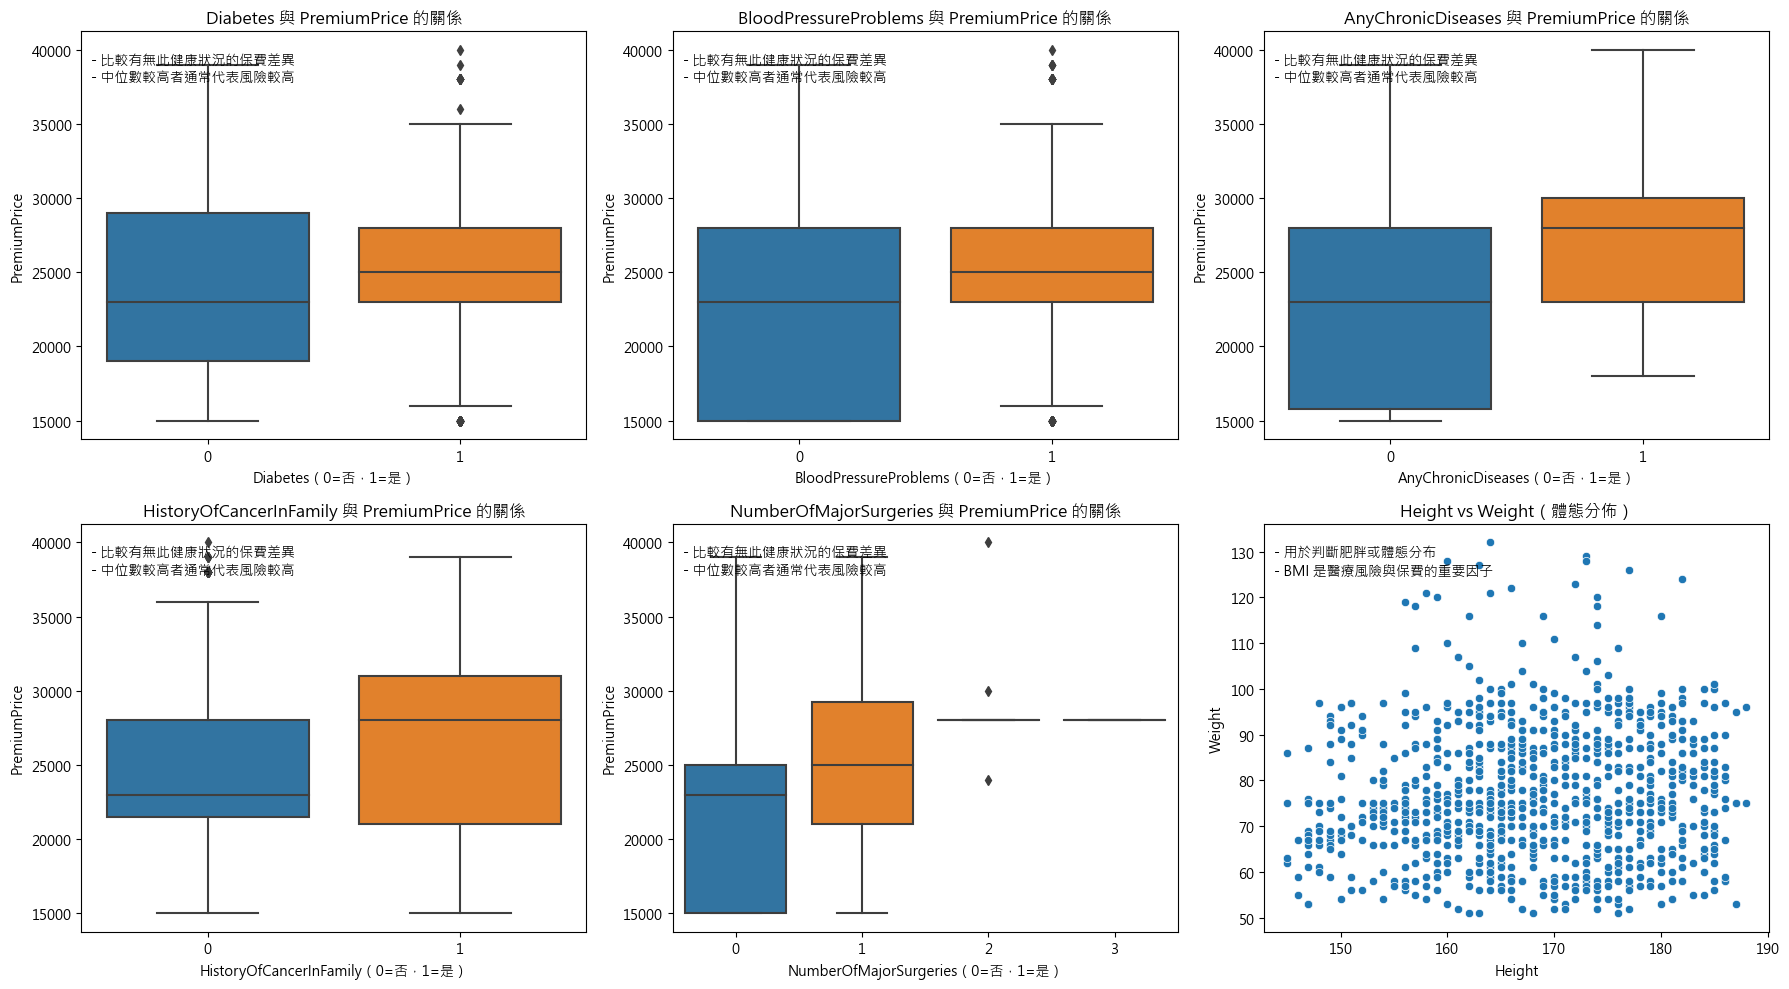

In [22]:
# 欲分析的欄位
box_cols = [
    "Diabetes",
    "BloodPressureProblems",
    "AnyChronicDiseases",
    "HistoryOfCancerInFamily",
    "NumberOfMajorSurgeries"
]

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

 # 1️⃣〜5️⃣：健康欄位 vs PremiumPrice（全部 Boxplot）
for i, col in enumerate(box_cols):
    sns.boxplot(x=df[col], y=df["PremiumPrice"], ax=axes[i])
    axes[i].set_title(f"{col} 與 PremiumPrice 的關係")
    axes[i].set_xlabel(f"{col}（0=否，1=是）")
    axes[i].set_ylabel("PremiumPrice")
    axes[i].text(0.02, 0.95,
                 "- 比較有無此健康狀況的保費差異\n"
                 "- 中位數較高者通常代表風險較高",
                 transform=axes[i].transAxes, fontsize=10, va='top')

# 6️⃣ Height vs Weight（體態分布 → BMI 相關）
sns.scatterplot(x=df["Height"], y=df["Weight"], ax=axes[5])
axes[5].set_title("Height vs Weight（體態分佈）")
axes[5].set_xlabel("Height")
axes[5].set_ylabel("Weight")
axes[5].text(0.02, 0.95,
             "- 用於判斷肥胖或體態分布\n"
             "- BMI 是醫療風險與保費的重要因子",
             transform=axes[5].transAxes, fontsize=10, va='top')

plt.tight_layout()
plt.show()

## 使用 Subplots 建立子圖

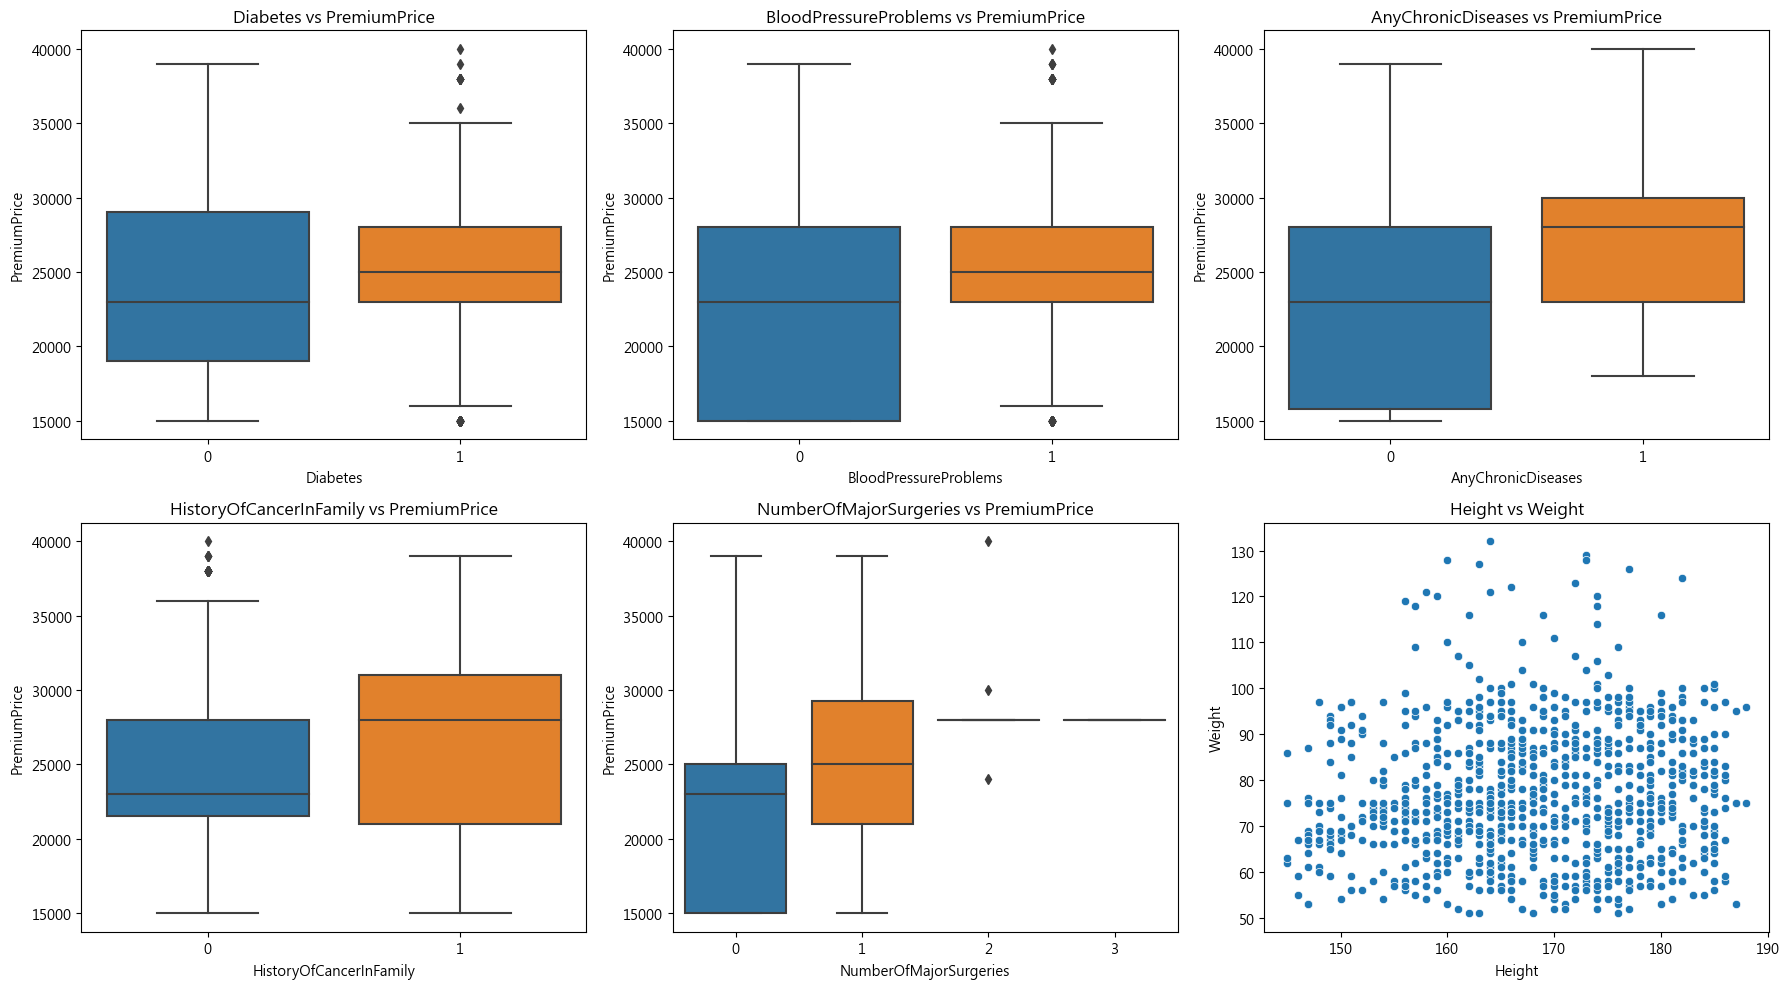

In [23]:
# ---- 使用 subplots 建立子圖 ----
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for i, col in enumerate(box_cols):
    sns.boxplot(x=df[col], y=df["PremiumPrice"], ax=axes[i])
    axes[i].set_title(f"{col} vs PremiumPrice")

sns.scatterplot(x=df["Height"], y=df["Weight"], ax=axes[5])
axes[5].set_title("Height vs Weight")

plt.tight_layout()
plt.show()

## 使用 add_subplot 建立子圖

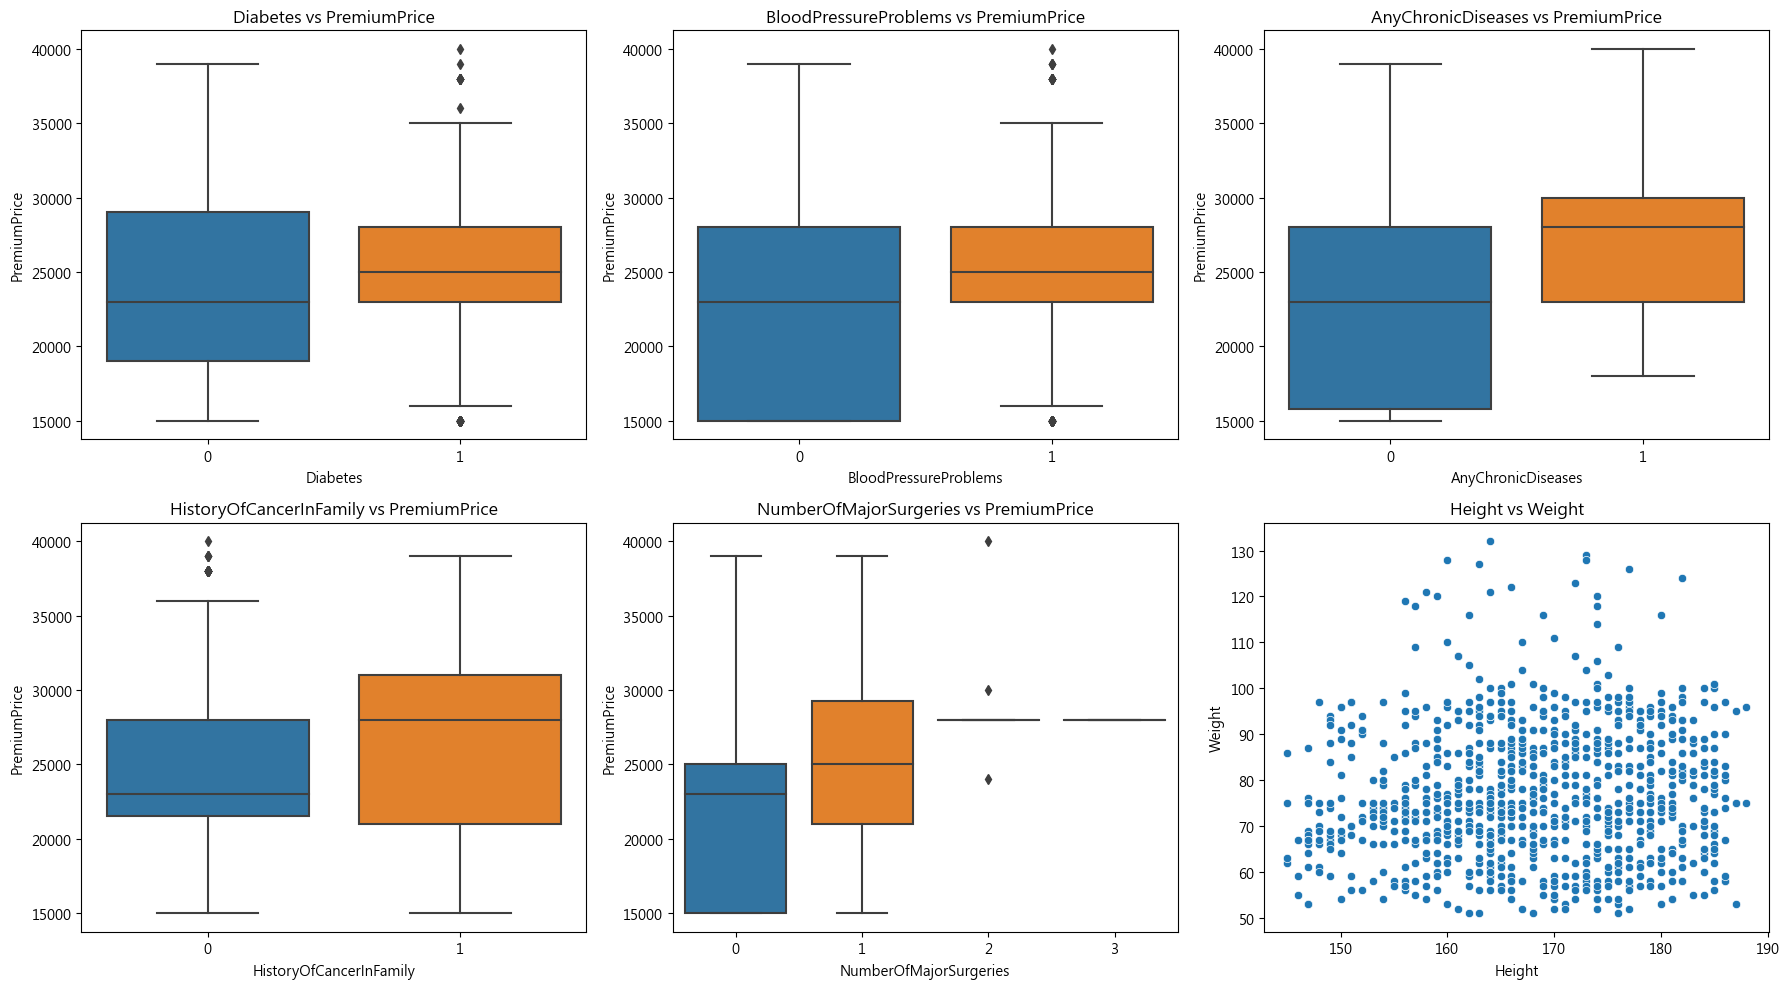

In [24]:
# ---- 使用 add_subplot 建立子圖 ----
fig = plt.figure(figsize=(18, 10))
axes = []

# 手動建立：2 行、3 列、6 個子圖
for i in range(1, 7):
    axes.append(fig.add_subplot(2, 3, i))

for i, col in enumerate(box_cols):
    sns.boxplot(x=df[col], y=df["PremiumPrice"], ax=axes[i])
    axes[i].set_title(f"{col} vs PremiumPrice")

sns.scatterplot(x=df["Height"], y=df["Weight"], ax=axes[5])
axes[5].set_title("Height vs Weight")

plt.tight_layout()
plt.show()

## 使用 GridSpec 建置不規則排列

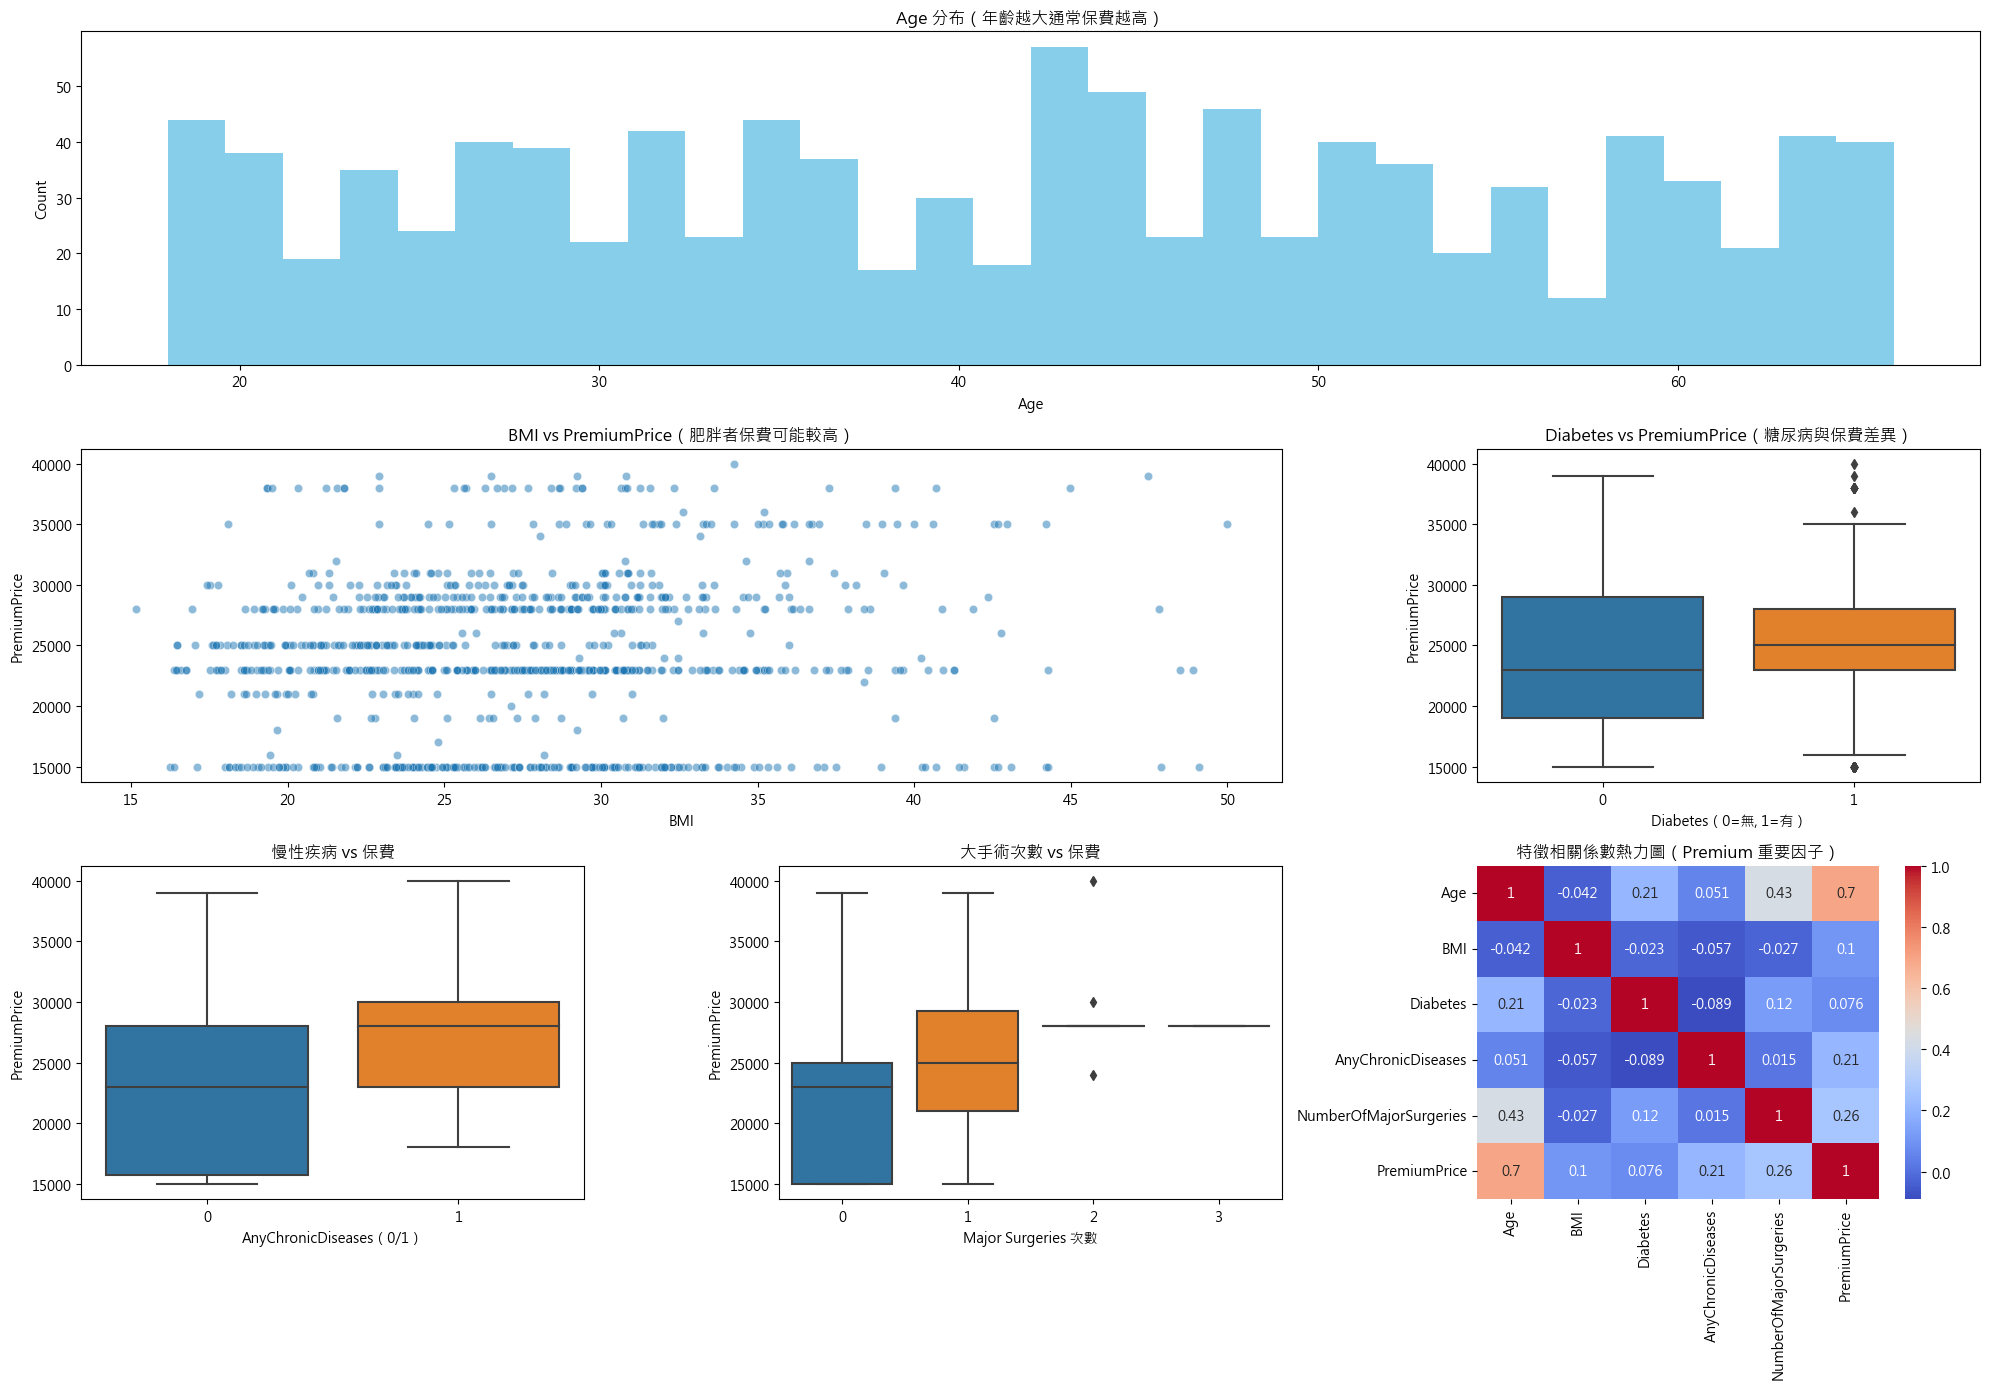

In [25]:
# 計算 BMI（醫療資料必備）
df["BMI"] = df["Weight"] / (df["Height"]/100)**2

# ---- 建立 GridSpec ----
fig = plt.figure(figsize=(20, 14))
gs = fig.add_gridspec(3, 3)  # 3 行 × 3 列 GridSpec

# 子圖配置
ax1 = fig.add_subplot(gs[0, :])       # 第 1 列 → 全欄跨 3 欄
ax2 = fig.add_subplot(gs[1, :2])      # 第二列左側 → 跨 2 欄
ax3 = fig.add_subplot(gs[1, 2])       # 第二列右側 → 單欄
ax4 = fig.add_subplot(gs[2, 0])       # 第三列左
ax5 = fig.add_subplot(gs[2, 1])       # 第三列中
ax6 = fig.add_subplot(gs[2, 2])       # 第三列右

# ============================================================
# 1️⃣ Age 分布（醫療資料最重要的風險因子）
# ============================================================
ax1.hist(df["Age"], bins=30, color="skyblue")
ax1.set_title("Age 分布（年齡越大通常保費越高）")
ax1.set_xlabel("Age")
ax1.set_ylabel("Count")
# 洞察：
# - 若右偏，代表客群年齡偏高
# - 年齡是醫療費率最重要特徵之一

# ============================================================
# 2️⃣ BMI vs Premium（體態影響保費）
# ============================================================
sns.scatterplot(x=df["BMI"], y=df["PremiumPrice"], alpha=0.5, ax=ax2)
ax2.set_title("BMI vs PremiumPrice（肥胖者保費可能較高）")
ax2.set_xlabel("BMI")
ax2.set_ylabel("PremiumPrice")
# 洞察：
# - 高 BMI 族群可能具有較高醫療風險
# - 若呈現強正相關，保費模型應加入 BMI 因子

# ============================================================
# 3️⃣ Diabetes vs Premium（糖尿病者保費比較）
# ============================================================
sns.boxplot(x=df["Diabetes"], y=df["PremiumPrice"], ax=ax3)
ax3.set_title("Diabetes vs PremiumPrice（糖尿病與保費差異）")
ax3.set_xlabel("Diabetes（0=無, 1=有）")
# 洞察：
# - 糖尿病病患通常保費較高
# - 可檢查中位數是否上升

# ============================================================
# 4️⃣ AnyChronicDiseases vs Premium（慢性疾病）
# ============================================================
sns.boxplot(x=df["AnyChronicDiseases"], y=df["PremiumPrice"], ax=ax4)
ax4.set_title("慢性疾病 vs 保費")
ax4.set_xlabel("AnyChronicDiseases（0/1）")
# 洞察：
# - 慢性病族群醫療風險較高，保費是否上升？

# ============================================================
# 5️⃣ NumberOfMajorSurgeries vs Premium（大手術次數）
# ============================================================
sns.boxplot(x=df["NumberOfMajorSurgeries"], y=df["PremiumPrice"], ax=ax5)
ax5.set_title("大手術次數 vs 保費")
ax5.set_xlabel("Major Surgeries 次數")
# 洞察：
# - 手術次數越多，過往病史越複雜，應有更高風險

# ============================================================
# 6️⃣ 相關係數熱力圖（整體特徵 vs 保費）
# ============================================================
corr = df[["Age","BMI","Diabetes","AnyChronicDiseases",
           "NumberOfMajorSurgeries","PremiumPrice"]].corr()

sns.heatmap(corr, annot=True, cmap="coolwarm", ax=ax6)
ax6.set_title("特徵相關係數熱力圖（Premium 重要因子）")
# 洞察：
# - 哪些特徵與 PremiumPrice 最有關？（Age / BMI 通常最高）

plt.tight_layout()
plt.show()